In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from glob import glob

In [3]:
tf.__version__

'2.3.0'

In [4]:
#resize all images to the expected size
image_size = [224, 224]

#set train, test, validation dataset path
train_path = '/content/drive/My Drive/Datasets/Car brand classification/Datasets/Train'
test_path = '/content/drive/My Drive/Datasets/Car brand classification/Datasets/Test'

In [5]:
#import the ResNet50 architecture and add preprocessing layer, we are using ImageNet weights
ResNet50_model = keras.applications.resnet50.ResNet50(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
#freeze the weights of the pre-trained layers
for layer in ResNet50_model.layers:
  layer.trainable = False

In [7]:
#useful for getting number of output classes
folders = glob('/content/drive/My Drive/Datasets/Car brand classification/Datasets/Train/*')
folders

['/content/drive/My Drive/Datasets/Car brand classification/Datasets/Train/audi',
 '/content/drive/My Drive/Datasets/Car brand classification/Datasets/Train/lamborghini',
 '/content/drive/My Drive/Datasets/Car brand classification/Datasets/Train/mercedes']

In [8]:
ResNet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
#adding our own layers
layer_flatten = keras.layers.Flatten()(ResNet50_model.output)
output = keras.layers.Dense(len(folders), activation = "softmax")(layer_flatten)
model = keras.Model(inputs = ResNet50_model.input, outputs = output)

In [10]:
#summary of our model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
#compile the model and specify loss function and optimizer
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
#use the ImageDataGenerator class to load images from the dataset
train_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [13]:
#make sure you provide the same target size as initialied for the image size
training_set = train_data_generator.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_data_generator.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [14]:
#train the model
history = model.fit_generator(
  training_set,
  validation_data = test_set,
  epochs = 50,
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 2s 785ms/step - loss: 4.2665 - accuracy: 0.4062 - val_loss: 20.2029 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 362ms/step - loss: 12.8204 - accuracy: 0.3125 - val_loss: 7.9532 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 361ms/step - loss: 4.2373 - accuracy: 0.4219 - val_loss: 1.6741 - val_accuracy: 0.5862
Epoch 4/50
2/2 [==============================] - 1s 363ms/step - loss: 3.2520 - accuracy: 0.4062 - val_loss: 2.8411 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 1s 357ms/step - loss: 2.2326 - accuracy: 0.4375 - val_loss: 3.2566 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 366ms/step - loss: 2.6409 - accuracy: 0.5469 - val_loss: 6.2380 - val_accuracy: 0.3621
Epoch 7/50
2/2 [==============================] - 1s 362ms/step - loss: 3.4868 - a

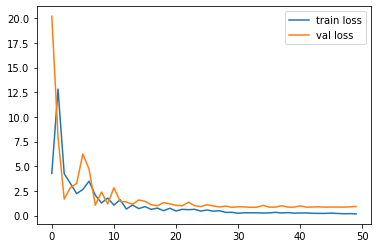

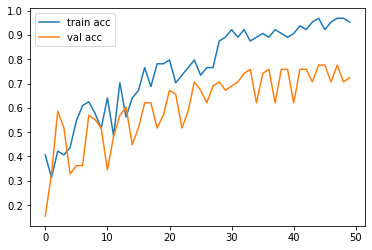

<Figure size 432x288 with 0 Axes>

In [15]:
#save the model as an h5 file
model.save('/content/drive/My Drive/Datasets/Car brand classification/model_resnet50.h5')

#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
model.evaluate(test_set)

2/2 [==============================] - 0s 48ms/step - loss: 0.9151 - accuracy: 0.7241


[0.9151435494422913, 0.7241379022598267]

In [17]:
#using the model to make predictions
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0])